## Урок 3
### Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных
### Домашнее задание

#### Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

Подгрузим библиотеку numpy для проверки

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
v = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

Среднее арифметическое

In [3]:
sum_v = 0
for i in v:
    sum_v += i
mean_v = sum_v / len(v)
print('Посчитанное значение', mean_v, 'и посчитанное с использованием библиотек', np.mean(v))

Посчитанное значение 73.14285714285714 и посчитанное с использованием библиотек 73.14285714285714


Смещённая оценка дисперсии

In [4]:
sum_dv = 0
for i in v:
    sum_dv += (i - mean_v)**2
ds_v = sum_dv / len(v)
print('Посчитанное значение', ds_v, 'и посчитанное с использованием библиотек', np.array(v).var(ddof=0))

Посчитанное значение 2135.074829931973 и посчитанное с использованием библиотек 2135.0748299319725


Несмещённая оценка дисперсии

In [5]:
sum_dv = 0
for i in v:
    sum_dv += (i - mean_v)**2
dns_v = sum_dv / (len(v)-1)
print('Посчитанное значение', dns_v, 'и посчитанное с использованием библиотек', np.array(v).var(ddof=1))

Посчитанное значение 2241.8285714285716 и посчитанное с использованием библиотек 2241.828571428571


Среднее квадратичное отклонение для данной выборки

In [6]:
sko_v = dns_v ** 0.5
print('Посчитанное значение', sko_v, 'и посчитанное с использованием библиотек', np.array(v).std(ddof=1))

Посчитанное значение 47.34795213553139 и посчитанное с использованием библиотек 47.347952135531386


#### Задача 2

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выбросы в выборке (используя для этого метод как при построении "усов" из boxplot).

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

Медиана

In [7]:
v_sort = sorted(v)
v_mediana = v_sort[len(v) // 2] if len(v) % 2 == 1 else (v_sort[len(v) // 2 - 1] + v_sort[len(v) // 2]) * 0.5
print('Посчитанное значение', v_mediana, 'и посчитанное с использованием библиотек', np.median(v_sort))

Посчитанное значение 70 и посчитанное с использованием библиотек 70.0


Первый квартиль

In [8]:
v_kvart_1 = v_sort[len(v) // 4] if len(v) % 4 == 0 else (v_sort[len(v) // 4] + v_sort[(len(v) + 1 ) // 4]) * 0.5
print('Посчитанное значение', v_kvart_1, 'и посчитанное с использованием библиотек', np.quantile(v_sort, 0.25))

Посчитанное значение 45.0 и посчитанное с использованием библиотек 45.0


Третий квартиль

In [9]:
v_kvart_3 = v_sort[len(v) // 4 * 3] if len(v) % 4 == 0 else (v_sort[len(v) // 4 * 3] + v_sort[(len(v) + 1 ) // 4 * 3]) * 0.5
print('Посчитанное значение', v_kvart_3, 'и посчитанное с использованием библиотек', np.quantile(v_sort, 0.75))

Посчитанное значение 84.0 и посчитанное с использованием библиотек 84.0


Интерквартильное расстояние

In [10]:
v_kvart_3 - v_kvart_1

39.0

Выбросы

In [11]:
for i in v:
    if abs(i - mean_v) > sko_v * 1.5:
        print(i)

230
150


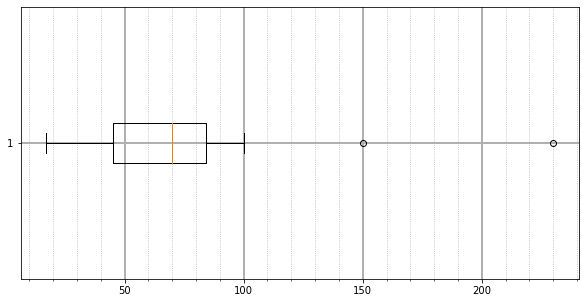

In [26]:
fig = plt.figure(figsize=[10, 5])
plt.boxplot(v, vert=False)
plt.minorticks_on()
plt.grid(which='major',
         linewidth = 2)
plt.grid(which='minor', 
        linestyle = ':')

#### Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Используем Байеса. А1 - студент факультета А, А2 - студент факультета В, А3 - студент факультета С, а В - студент сдал первую сессию.

In [27]:
a1 = 0.8
a2 = 0.7
a3 = 0.9

In [35]:
P1 = (a1 * 0.25) / (a1 * 0.25 + a2 * 0.25 + a3 * 0.5)
P2 = (a2 * 0.25) / (a1 * 0.25 + a2 * 0.25 + a3 * 0.5)
P3 = (a3 * 0.5) / (a1 * 0.25 + a2 * 0.25 + a3 * 0.5)
print('Вероятности того, что студент учится на: факультет А', round(P1, 3), ', факультет B', round(P2, 3), ', факультет C', round(P3, 3))

Вероятности того, что студент учится на: факультет А 0.242 , факультет B 0.212 , факультет C 0.545
